Louie Balderrama<br>
Springboard Data Science Career Track, January 2019 cohort<br>

<h1 align="center">Inferential Statistics</h1>

There are a total of 25 features to our final `df` dataframe. Of these, we'll formally test each to find out which make good candidates for our model.

### Popularity and Price ###
We've already discussed how `number_of_reviews` can be a good indicator of a listing's popularity. Now let's test its correlation with `price`. A reliable indicator of correlation for two variables is the Pearson coefficient. But using this approach will need to meet some assumptions.

One of these assumptions is homoscedasticity, or if there is homogeneity of variances. We make use of *Levene’s test* and set the critical value `alpha` to `0.05`. The hypothesis statements are below:
* **Null Hypothesis**: There is homogeneity of variances between `price` and `number_of_reviews`
* **Alternative Hypothesis**: There is no homogeneity of variances between `price` and `number_of_reviews`

In [70]:
alpha = 0.05

stat, p = stats.levene(df["number_of_reviews"], df["price"])
print("Levene W: %.3f" % stat)
print("P-Value: %f\n" % p)
print("P-Value larger than alpha? %s" % str(p > alpha))

if p > alpha:
    print("Assumption of homoscedasticity is NOT violated (do NOT reject null hypothesis)\n")
else:
    print("Assumption of homoscedasticity IS violated (reject null hypothesis)\n")

Levene W: 5321.392
P-Value: 0.000000

P-Value larger than alpha? False
Assumption of homoscedasticity IS violated (reject null hypothesis)



Since our p-value `p` is very close to zero, and thus much lower than our alpha, we cannot assume that the variances of the two variables are similar. We therefore cannot use Pearson coefficient to measure correlation. When it fails the variance homogeneity assumption, a good candidate would be the *Spearman rank*. This approach also happens to be a reliable measure for when we do not know whether the distribution is normal or not.

Below is the scatter plot for the `price` and `number_of_reviews` variables. First-degree `polyfit` function was used to produce the line of best fit. Their Spearman rank is also below. At `-0.26`, the two variables are negatively correlated (hence the negative slope), though the correlation is considered weak to moderate.

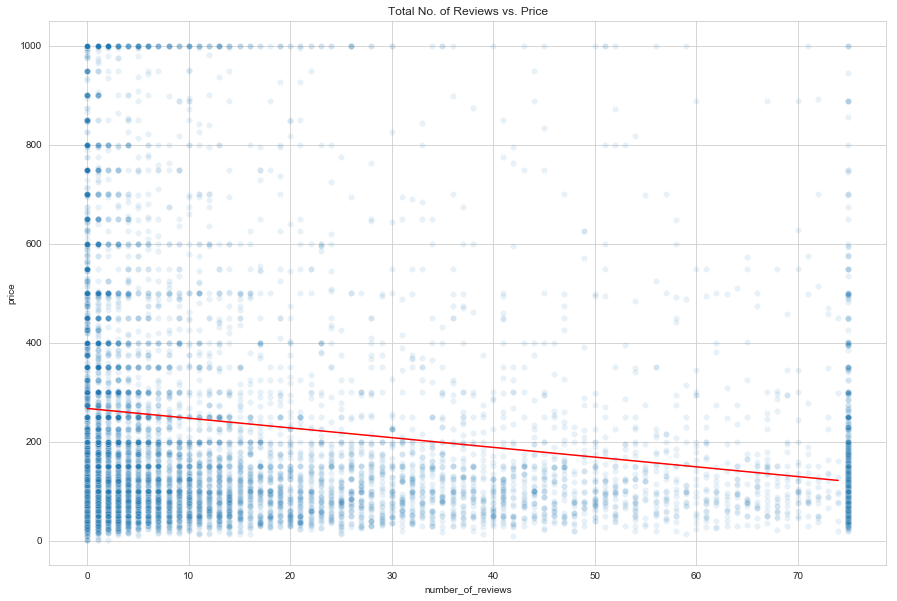


Spearman Rank


,price,number_of_reviews
price,1.000000,-0.261526
number_of_reviews,-0.261526,1.000000


In [71]:
f, axes = plt.subplots(figsize=(15,10))

ax = sns.scatterplot(x="number_of_reviews", y="price", \
                data=df, alpha=0.1)
m, b = np.polyfit(df["number_of_reviews"], df["price"], 1)
reg_x = np.arange(0, max(df["number_of_reviews"]))
reg_y = m * reg_x + b
ax = sns.lineplot(reg_x, reg_y, color="red")
plot_title = "Total No. of Reviews" + " vs. Price"
ax.set_title(plot_title)
plt.show()

print("\nSpearman Rank")
display(df[["price", "number_of_reviews"]].corr(method="spearman"))

### Crimes and Price ###
Let's look at the relationship between `Total No. of Crimes` and `price` to understand how crime data might affect Airbnb listings. Note that as we've done during Data Wrangling, the crimes tally is per zip code and *not* per listing. Therefore all the listings within a zip code have the same value for a given crime tally.

Again we perform Levene's test to see if there is homoscedasticity between the two.
* **Null Hypothesis**: There is homogeneity of variances between `price` and `Total No. of Crimes`
* **Alternative Hypothesis**: There is no homogeneity of variances between `price` and `Total No. of Crimes`

Once more, we see that the assumption is violated. We then resolve to use the Spearman rank to measure correlation. As the `Total No. of Crimes` and `price` plot shows, we see that there is almost no correlation between the two. A Spearman rank of `0.02` is very close to zero and indicates very weak correlation.

Levene W: 29318.802
P-Value: 0.000000

P-Value larger than alpha? False
Assumption of homoscedasticity IS violated (reject null hypothesis)



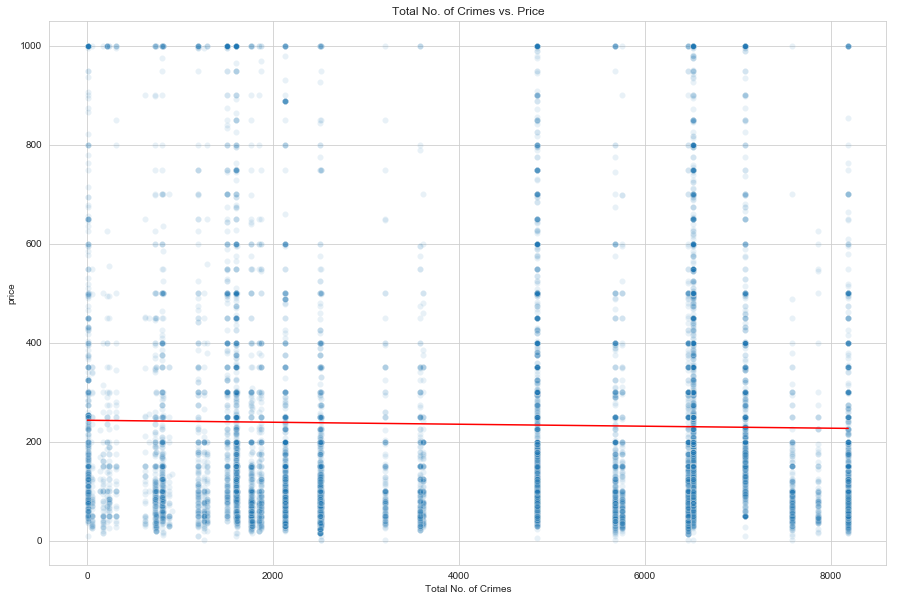


Spearman Rank


,price,Total No. of Crimes
price,1.0000,0.0216
Total No. of Crimes,0.0216,1.0000


In [72]:
stat, p = stats.levene(df["Total No. of Crimes"], df["price"])
print("Levene W: %.3f" % stat)
print("P-Value: %f\n" % p)
print("P-Value larger than alpha? %s" % str(p > alpha))

if p > alpha:
    print("Assumption of homoscedasticity is NOT violated (do NOT reject null hypothesis)\n")
else:
    print("Assumption of homoscedasticity IS violated (reject null hypothesis)\n")

f, axes = plt.subplots(figsize=(15,10))

ax = sns.scatterplot(x="Total No. of Crimes", y="price", \
                data=df, alpha=0.1)
m, b = np.polyfit(df["Total No. of Crimes"], df["price"], 1)
reg_x = np.arange(0, max(df["Total No. of Crimes"]))
reg_y = m * reg_x + b
ax = sns.lineplot(reg_x, reg_y, color="red")
plot_title = "Total No. of Crimes" + " vs. Price"
ax.set_title(plot_title)
plt.show()

print("\nSpearman Rank")
display(df[["price", "Total No. of Crimes"]].corr(method="spearman"))

In fact, the same is true when it comes to the tally of each major crime occurrence in Austin, TX. The Spearman matrix shows very weak correlation between each tally and `price`. What the data says, though, is that each major crime is somewhat related to another. The strongest correlation is between `Aggravated Assault` and `Robbery`, with a score of `0.91`, suggesting that the presence of one in an area would highly likely exhibit the presence of the other.

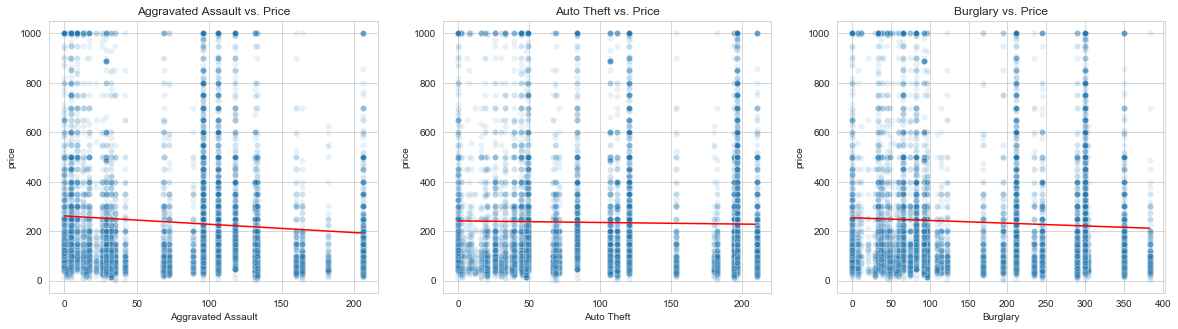

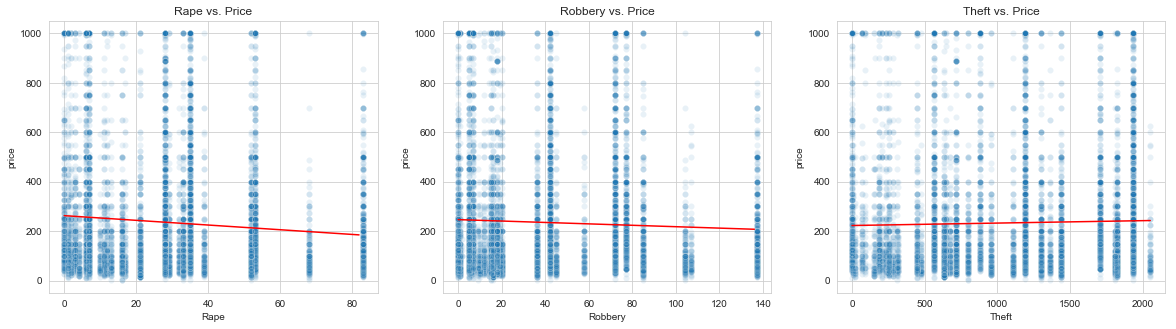


Spearman Matrix


,price,Aggravated Assault,Auto Theft,Burglary,Rape,Robbery,Theft
price,1.000000,-0.061493,0.040461,-0.032125,-0.022996,0.001513,0.079604
Aggravated Assault,-0.061493,1.000000,0.728260,0.750803,0.871094,0.912597,0.681305
Auto Theft,0.040461,0.728260,1.000000,0.952476,0.841419,0.710272,0.914276
Burglary,-0.032125,0.750803,0.952476,1.000000,0.826726,0.718767,0.883758
Rape,-0.022996,0.871094,0.841419,0.826726,1.000000,0.801991,0.847183
Robbery,0.001513,0.912597,0.710272,0.718767,0.801991,1.000000,0.696309
Theft,0.079604,0.681305,0.914276,0.883758,0.847183,0.696309,1.000000


In [73]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
continuous = ["Aggravated Assault", "Auto Theft", "Burglary"]
for i in range(3):
    ax = sns.scatterplot(x=df[continuous[i]], y=df["price"], \
                         data=df, alpha=0.1, ax=axes[i])
    m, b = np.polyfit(df[continuous[i]], df["price"], 1)
    reg_x = np.arange(0, max(df[continuous[i]]))
    reg_y = m * reg_x + b
    ax = sns.lineplot(reg_x, reg_y, color="red", ax=axes[i])
    plot_title = continuous[i] + " vs. Price"
    ax.set_title(plot_title)
plt.show()

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
continuous = ["Rape", "Robbery", "Theft"]
for i in range(3):
    ax = sns.scatterplot(x=df[continuous[i]], y=df["price"], \
                         data=df, alpha=0.1, ax=axes[i])
    m, b = np.polyfit(df[continuous[i]], df["price"], 1)
    reg_x = np.arange(0, max(df[continuous[i]]))
    reg_y = m * reg_x + b
    ax = sns.lineplot(reg_x, reg_y, color="red", ax=axes[i])
    plot_title = continuous[i] + " vs. Price"
    ax.set_title(plot_title)    
plt.show()

print("\nSpearman Matrix")
continuous=["Aggravated Assault", "Auto Theft", "Burglary", \
            "Rape", "Robbery", "Theft"]
display(df[["price", *continuous]].corr(method="spearman"))

To intuitively see how each major crime is correlated with another, the pair plot is shown below. The slope of each regression line and how each clusters are in step indicate positive correlation among the crime variables.

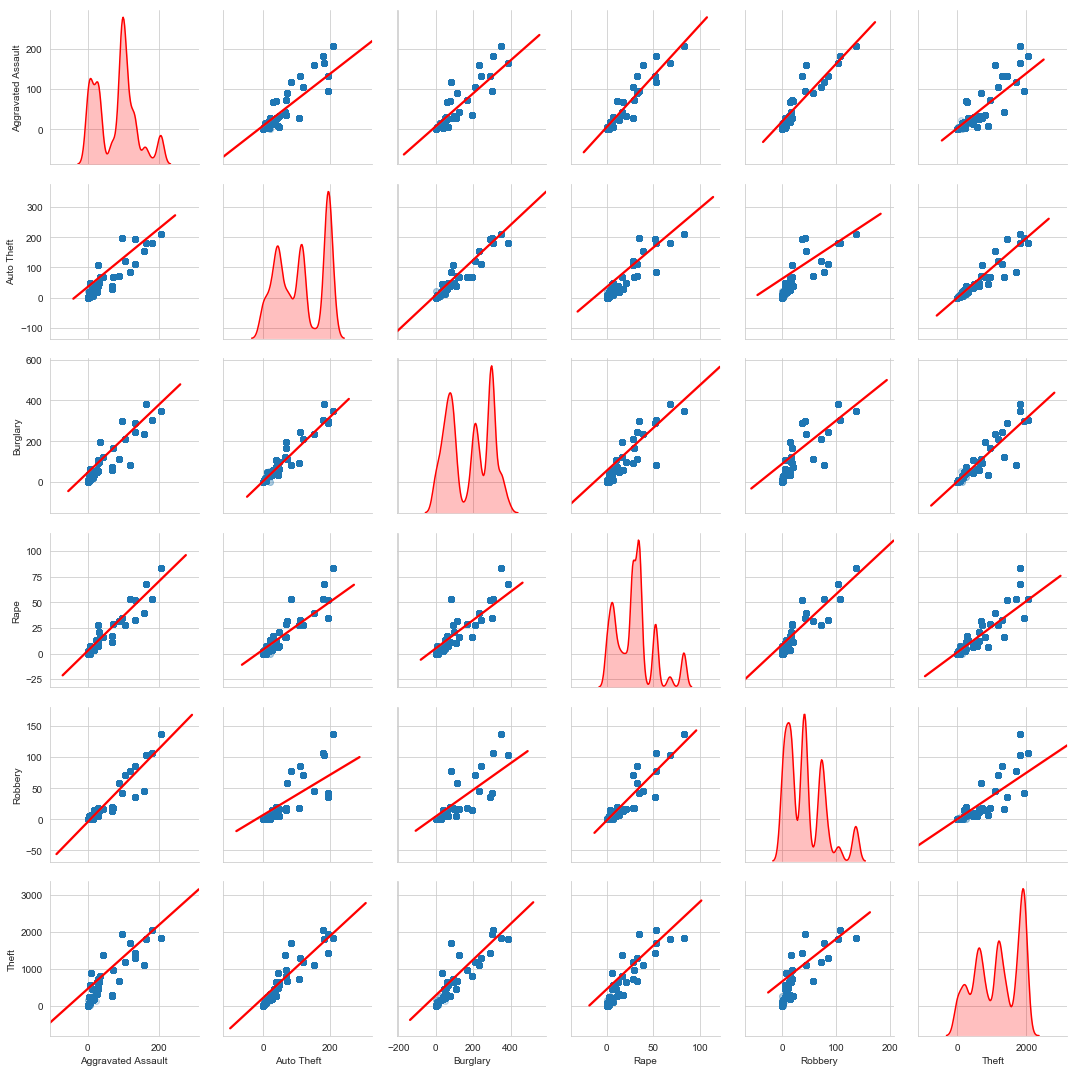

In [74]:
sns.pairplot(df[continuous], kind="reg", diag_kind="kde", \
            plot_kws={"line_kws":{"color":"red"}, \
                      "scatter_kws": {"alpha": 0.1}}, \
            diag_kws={"color":"red"})
plt.show()

### Location and Price ###
Locations are deonted in our `df` dataframe by `zipcode`. In order to find out what the appropriate signifiance test can be used for our categorical features, it's important to first understand the nature of our `price` function. A popular test to check if the distribution is normal is the *Shapiro Wilk test*. However, the accuracy for its p-value wanes if the data contains 5,000 samples, as in the case of our dataset. So we'll opt to use the *Kolmogorov-Smirnov test* instead.

We want to be able to find out if `price` follows a normal distribution.
* **Null Hypothesis**: The `price` curve is normal
* **Alternative Hypothesis**: The `price` curve is NOT normal

In [75]:
mean = np.mean(df["price"])
std = np.std(df["price"])

stat, p = stats.kstest(df["price"], "norm", args=(mean, std))

print("KS-Statistic: %.3f" % stat)
print("P-Value: %f\n" % p)
print("P-Value larger than alpha? %s" % str(p > alpha))

if p > alpha:
    print("Price Curve appears Normal (do NOT reject null hypothesis)\n")
else:
    print("Price Curve does NOT appear Normal (reject null hypothesis)\n")

KS-Statistic: 0.227
P-Value: 0.000000

P-Value larger than alpha? False
Price Curve does NOT appear Normal (reject null hypothesis)



Our p-value `p` is significantly smaller than our critical value of `0.05`, suggesting that it's is extremely unlikely we get a curve like ours if we assumed that our curve is usually normal. We cannot therefore assume normality and have to use nonparametric statistical tests.

Our goal is to identify if our categorizing of `price` by `zipcode` produce the same distribution. If so, then `zipcode` would not make a good feature for our model since it does not disriminate cheap listings from expensive listings. Our hypothesis statements are below.
* **Null Hypothesis**: The `zipcode` distributions are similar
* **Alternative Hypothesis**: The `zipcode` distributions are NOT similar

We'll use *Kruskal-Wallis test* because it's the nonparametric analog to ANOVA testing. This test is suited for variables with multiple discrete categories, as in the case for `zipcode`.

In [76]:
variables = ""
for index, count in enumerate(df["zipcode"].unique()):
    exec("data" + str(index) + "= df[df['zipcode']== " + \
         str(count) + "]['price']")
    variables = variables + "data" + str(index) + ", "
variables = variables[:-2]

exec("stat, p = stats.kruskal(" + variables + ")")
print("Zip Code", "\n--------")
print("Number of variables: %d" % (index+1))
print("Kruskal-Wallis H: %.3f" % stat)
print("P-Value: %f" % p)
print("P-Value larger than alpha? %s" % str(p > alpha))

if p > alpha:
    print("Distributions are the same (do NOT reject null hypothesis)\n")
else:
    print("Distributions are NOT the same (reject null hypothesis)\n")

Zip Code 
--------
Number of variables: 48
Kruskal-Wallis H: 1584.793
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)



The p-valus is significantly low and so we reject our null hypothesis and conclude that the distributions for `zipcode` are not similar, making `zipcode` a good feature for our predictive model. 

### Other Categorical Features ###
The following categories listed below have values with `0` signifiying False and `1` signifying True.
* host_is_superhost
* host_identity_verified
* Private Entry
* Family-friendly
* Pets OK
* Self Check-in
* Balcony

The hypothesis statements for these are below:
* **Null Hypothesis**: The distributions for the category are similar
* **Alternative Hypothesis**: The distributions for the category are NOT similar

Because of their nonparametric nature, and because there are only two outcomes, we'll be using *Mann-Whitney test* which is similar to Student's T-test but for distributions that are non-normal.

In [77]:
categories = ["host_is_superhost", "host_identity_verified", "Private Entry", \
               "Family-friendly", "Pets OK", "Self Check-in", "Balcony"]

for category in categories:
    data0 = df[df[category] == 0]["price"]
    data1 = df[df[category] == 1]["price"]

    stat, p = stats.mannwhitneyu(data0, data1)
    print(category, "\n--------------------")
    print("Mann-Whitney U: %.3f" % stat)
    print("P-Value: %f" % p)
    print("P-Value larger than alpha? %s" % str(p > alpha))

    if p > alpha:
        print("Distribution is the same (do NOT reject null hypothesis)\n")
    else:
        print("Distribution is NOT the same (reject null hypothesis)\n")

host_is_superhost 
--------------------
Mann-Whitney U: 11397718.500
P-Value: 0.000000
P-Value larger than alpha? False
Distribution is NOT the same (reject null hypothesis)

host_identity_verified 
--------------------
Mann-Whitney U: 17540981.000
P-Value: 0.166199
P-Value larger than alpha? True
Distribution is the same (do NOT reject null hypothesis)

Private Entry 
--------------------
Mann-Whitney U: 13825506.500
P-Value: 0.000000
P-Value larger than alpha? False
Distribution is NOT the same (reject null hypothesis)

Family-friendly 
--------------------
Mann-Whitney U: 12680419.000
P-Value: 0.000000
P-Value larger than alpha? False
Distribution is NOT the same (reject null hypothesis)

Pets OK 
--------------------
Mann-Whitney U: 14355032.000
P-Value: 0.000050
P-Value larger than alpha? False
Distribution is NOT the same (reject null hypothesis)

Self Check-in 
--------------------
Mann-Whitney U: 14716557.000
P-Value: 0.000000
P-Value larger than alpha? False
Distribution is NO

The next batch of features are also categorical but all of which have more than two values.
* host_verifications_count
* property_type (simple)
* room_type
* cancellation_policy
* accommodates
* guests_included
* extra_people
* minimum_nights
* Murder

The hypothesis statements for these are:
* **Null Hypothesis**: The distributions for the category are similar
* **Alternative Hypothesis**: The distributions for the category are NOT similar

Like with the `zipcode` feature, we'll use the *Kruskal-Wallis* approach to test the hypothesis for each category.

In [78]:
categories = ["host_verifications_count", "property_type (simple)", \
              "room_type", "cancellation_policy", "accommodates", \
              "guests_included", "extra_people", "minimum_nights", "Murder"]

for category in categories:
    series = eval("df['" + category + "']")
    cat_str = category
    variables = ""
    for index, count in enumerate(series.unique()):
        if type(count) == str:
            count = "'" + count + "'"
        exec("data" + str(index) + "= df[df['" + cat_str + "']== " + \
             str(count) + "]['price']")
        variables = variables + "data" + str(index) + ", "
    variables = variables[:-2]

    exec("stat, p = stats.kruskal(" + variables + ")")
    print(cat_str, "\n--------------------")
    print("Number of variables: %d" % (index+1))
    print("Kruskal-Wallis H: %.3f" % stat)
    print("P-Value: %f" % p)
    print("P-Value larger than alpha? %s" % str(p > alpha))

    if p > alpha:
        print("Distributions are the same (do NOT reject null hypothesis)\n")
    else:
        print("Distributions are NOT the same (reject null hypothesis)\n")

host_verifications_count 
--------------------
Number of variables: 14
Kruskal-Wallis H: 181.691
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)

property_type (simple) 
--------------------
Number of variables: 3
Kruskal-Wallis H: 266.037
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)

room_type 
--------------------
Number of variables: 3
Kruskal-Wallis H: 3318.730
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)

cancellation_policy 
--------------------
Number of variables: 5
Kruskal-Wallis H: 591.027
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)

accommodates 
--------------------
Number of variables: 18
Kruskal-Wallis H: 4821.669
P-Value: 0.000000
P-Value larger than alpha? False
Distributions are NOT the same (reject null hypothesis)

guests_inc

We've now explored all the features of our `df` dataframe. To summarize, the following variables have proved to be meaningful for our model. The continuous feautres have slight to moderate correlation with `price` and the discrete features have constituents that have distributions that are distinct from one another.
1. number_of_reviews
2. zipcode
3. host_is_superhost
4. Private Entry
5. Family-friendly
6. Pets OK
7. Self Check-in
8. Balcony
9. host_verifications_count
10. property_type (simple)
11. room_type
12. cancellation_policy
13. accommodates
14. guests_included
15. extra_people 
16. minimum_nights
17. Murder

The following features were identified as variables that may not be helpful in distinguishing the `price` of a listing. The continuous features have almost no correlation with `price` and the discrete features have similar distributions.
1. Total No. of Crimes
2. Aggravated Assault
3. Auto Theft
4. Burglary
5. Rape
6. Robbery
7. Theft
8. host_identity_verified

We have now closely inspected every variable of our `df` dataframe. Now we have a better understanding of how well each feature may predict the nightly rate of an Airbnb listing in Austin, TX. We can now build our predictive model upon these and be able to tackle our problem statement.